What are the correlations between the size of operational holdings and their irrigation status across different social categories? 
a.	Rationale: This question examines the relationship between landholding sizes and irrigation practices among various social groups. It helps in understanding disparities and resource allocation efficiency.
b.	Datasets Required: 
i.	Estimated Number and Area of Operational Holdings by Size Classes and Tenancy Status
ii.	Social Category wise Estimated Number of Operational Holdings by Size Classes and Irrigation Status


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [2]:
# df_opholding_by_size = pd.read_csv('Estimated Number and Area of Operational Holdings by Size Classes and Tenancy Status/ZIP/7171/7171_source_data.csv')
df_op_holding_by_size = pd.read_csv('Estimated Number and Area of Operational Holdings by Size Classes and Tenancy Status/ZIP/7171/NDAP_REPORT_7171.csv')

df_social_category = pd.read_csv('Social Category wise Estimated Number of Operational Holdings by Size Classes and Irrigation Status/ZIP/7173/NDAP_REPORT_7173.csv')

In [3]:
print(len(df_op_holding_by_size))
print(len(df_op_holding_by_size))

29960
29960


In [4]:
print(df_social_category.shape)
print(df_op_holding_by_size.shape)
print(df_social_category.columns)
print(df_op_holding_by_size.columns)


(29960, 20)
(29960, 30)
Index(['ROWID', 'Country', 'State lgd code', 'State', 'District lgd code',
       'District', 'YearCode', 'Year', 'Social group type', 'Land area size',
       'Category of holdings', 'Wholly irrigated holdings',
       'Area of wholly irrigated holdings', 'Wholly unirrigated holdings',
       'Area of wholly unirrigated holdings', 'Partially irrigated holdings',
       'Irrigated area of partially irrigated holdings',
       'Area of partially irrigated holdings', 'Holdings receiving irrigation',
       'Net irrigated area of holdings receiving irrigation'],
      dtype='object')
Index(['ROWID', 'Country', 'State lgd code', 'State', 'District lgd code',
       'District', 'YearCode', 'Year', 'Social group type', 'Land area size',
       'Category of holdings', 'Wholly owned and self operated holdings',
       'Area of wholly owned and self operated holdings',
       'Wholly leased-in holdings', 'Area of wholly leased-in holdings',
       'Wholly otherwise opera

In [5]:
common_cols = ['ROWID' ,'Country', 'State lgd code', 'State', 'District lgd code',
       'District', 'YearCode', 'Year', 'Social group type','Land area size','Category of holdings' ]
print(len(common_cols))

11


In [6]:
def total_area(row):
       return row['Area of wholly irrigated holdings'] + row['Area of wholly unirrigated holdings'] + row['Area of partially irrigated holdings']  
       

In [7]:
def total_area2(row):
       return row['Area of wholly owned and self operated holdings'] + row['Area of wholly leased-in holdings'] + row['Area of wholly otherwise operated holdings']  + row['Owned area of partly owned and partly leased-in holdings'] + row['Leased area of partly owned and partly leased-in holdings']  + row['Owned area of partly owned and partly otherwise operated holdings'] + row['Operated area of partly owned and partly otherwise operated holdings']  + row['Leased-in area of partly leased-in and partly otherwise operated holdings'] + row['Operated area of partly leased-in and partly otherwise operated holdings'] + row['Owned area of partly owned, partly leased-in and partly otherwise operated holdings'] + row['Leased-in area of partly owned, partly leased-in and partly otherwise operated holdings']  + row['Operated area of partly owned, partly leased-in and partly otherwise operated holdings'] 
       

In [8]:
def total_no_of_holdings(row):
        return row['Wholly irrigated holdings'] + row['Wholly unirrigated holdings'] + row['Partially irrigated holdings']  

In [9]:
def avg_area_of_holding(row):
       if row['Total Number of Holdings'] == 0:
              return 0
       else:
              return row['Total Area']/row['Total Number of Holdings']

In [10]:
def avg_irrigated(row):
       if row['Total Number of Holdings'] == 0:
              return 0
       else:
              return row['Net irrigated area of holdings receiving irrigation']/row['Total Number of Holdings']

In [11]:
def percentage_irrigated_area(row):
       if row['Average area of a Holding'] == 0:
              return 0
       else:
              return row['Average Irrigated Area']/row['Average area of a Holding']

In [12]:
df = df_social_category.merge(df_op_holding_by_size, on=common_cols, how='inner')

In [13]:
# df[['Category of holdings','Land area size','Total Area','Total Number of Holdings','Average area of a Holding']].head(20)
df.head(200)

,ROWID,Country,State lgd code,State,District lgd code,District,YearCode,Year,Social group type,Land area size,...,Partly owned and partly otherwise operated holdings,Owned area of partly owned and partly otherwise operated holdings,Operated area of partly owned and partly otherwise operated holdings,Partly leased-in and partly otherwise operated holdings,Leased-in area of partly leased-in and partly otherwise operated holdings,Operated area of partly leased-in and partly otherwise operated holdings,"Partly owned, partly leased-in and partly otherwise operated holdings","Owned area of partly owned, partly leased-in and partly otherwise operated holdings","Leased-in area of partly owned, partly leased-in and partly otherwise operated holdings","Operated area of partly owned, partly leased-in and partly otherwise operated holdings"
0,1,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,(0.5-1.0),...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,(10.0-20.0),...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,(1.0-2.0),...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,(2.0-3.0),...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,20 & Above,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,India,1,Jammu And Kashmir,5,Jammu,2015,"Agriculture Year (Jul - Jun), 2015",Scheduled Tribes,(3.0-4.0),...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,197,India,1,Jammu And Kashmir,5,Jammu,2015,"Agriculture Year (Jul - Jun), 2015",Scheduled Tribes,(4.0-5.0),...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,198,India,1,Jammu And Kashmir,5,Jammu,2015,"Agriculture Year (Jul - Jun), 2015",Scheduled Tribes,(5.0-7.5),...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,199,India,1,Jammu And Kashmir,5,Jammu,2015,"Agriculture Year (Jul - Jun), 2015",Scheduled Tribes,(7.5-10.0),...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
group_by_cols = ['Country', 'State lgd code', 'State','YearCode', 'Year', 'Social group type','Land area size','Category of holdings']

In [15]:
# df2 = df.drop(['District lgd code',
#        'District','ROWID'], axis=1)

In [16]:
print(df2.columns)

Index(['Country', 'State lgd code', 'State', 'YearCode', 'Year',
       'Social group type', 'Land area size', 'Category of holdings',
       'Wholly irrigated holdings', 'Area of wholly irrigated holdings',
       'Wholly unirrigated holdings', 'Area of wholly unirrigated holdings',
       'Partially irrigated holdings',
       'Irrigated area of partially irrigated holdings',
       'Area of partially irrigated holdings', 'Holdings receiving irrigation',
       'Net irrigated area of holdings receiving irrigation',
       'Wholly owned and self operated holdings',
       'Area of wholly owned and self operated holdings',
       'Wholly leased-in holdings', 'Area of wholly leased-in holdings',
       'Wholly otherwise operated holdings',
       'Area of wholly otherwise operated holdings',
       'Partly owned and partly leased-in holdings',
       'Owned area of partly owned and partly leased-in holdings',
       'Leased area of partly owned and partly leased-in holdings',
       'Pa

In [17]:
summed_cols = [
       'Wholly irrigated holdings', 'Area of wholly irrigated holdings',
       'Wholly unirrigated holdings', 'Area of wholly unirrigated holdings',
       'Partially irrigated holdings',
       'Irrigated area of partially irrigated holdings',
       'Area of partially irrigated holdings', 'Holdings receiving irrigation',
       'Net irrigated area of holdings receiving irrigation',
       'Wholly owned and self operated holdings',
       'Area of wholly owned and self operated holdings',
       'Wholly leased-in holdings', 'Area of wholly leased-in holdings',
       'Wholly otherwise operated holdings',
       'Area of wholly otherwise operated holdings',
       'Partly owned and partly leased-in holdings',
       'Owned area of partly owned and partly leased-in holdings',
       'Leased area of partly owned and partly leased-in holdings',
       'Partly owned and partly otherwise operated holdings',
       'Owned area of partly owned and partly otherwise operated holdings',
       'Operated area of partly owned and partly otherwise operated holdings',
       'Partly leased-in and partly otherwise operated holdings',
       'Leased-in area of partly leased-in and partly otherwise operated holdings',
       'Operated area of partly leased-in and partly otherwise operated holdings',
       'Partly owned, partly leased-in and partly otherwise operated holdings',
       'Owned area of partly owned, partly leased-in and partly otherwise operated holdings',
       'Leased-in area of partly owned, partly leased-in and partly otherwise operated holdings',
       'Operated area of partly owned, partly leased-in and partly otherwise operated holdings']

In [18]:
# df3 = df2.groupby(group_by_cols).sum().reset_index()

In [53]:
group_by_cols2 = ['Country', 'State lgd code', 'State','District lgd code',
       'District','YearCode', 'Year', 'Social group type','Land area size','Category of holdings']
df3 = df.drop('ROWID',axis=1).groupby(group_by_cols2).sum().reset_index()

In [54]:
df3['Total Area'] = df3.apply(total_area,axis=1)
# df['Total Area2'] = df.apply(total_area2,axis=1)
df3['Total Number of Holdings'] = df3.apply(total_no_of_holdings,axis=1)
df3['Average area of a Holding'] = df3.apply(avg_area_of_holding,axis=1)
df3['Average Irrigated Area'] = df3.apply(avg_irrigated,axis=1)
df3['Percentage of Area Irrigated'] = df3.apply(percentage_irrigated_area,axis=1)

In [56]:
df3

,Country,State lgd code,State,District lgd code,District,YearCode,Year,Social group type,Land area size,Category of holdings,...,Operated area of partly leased-in and partly otherwise operated holdings,"Partly owned, partly leased-in and partly otherwise operated holdings","Owned area of partly owned, partly leased-in and partly otherwise operated holdings","Leased-in area of partly owned, partly leased-in and partly otherwise operated holdings","Operated area of partly owned, partly leased-in and partly otherwise operated holdings",Total Area,Total Number of Holdings,Average area of a Holding,Average Irrigated Area,Percentage of Area Irrigated
0,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,(0.5-1.0),Marginal,...,0.0,0.0,0.0,0.0,0.0,11.197,17.0,0.658647,0.604588,0.917924
1,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,(1.0-2.0),Small,...,0.0,0.0,0.0,0.0,0.0,10.250,7.0,1.464286,1.464286,1.000000
2,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,(10.0-20.0),Large,...,0.0,0.0,0.0,0.0,0.0,21.750,2.0,10.875000,10.875000,1.000000
3,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,(2.0-3.0),Semi-Medium,...,0.0,0.0,0.0,0.0,0.0,25.700,10.0,2.570000,2.570000,1.000000
4,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Institutional,(3.0-4.0),Semi-Medium,...,0.0,0.0,0.0,0.0,0.0,30.000,9.0,3.333333,3.333333,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29835,India,38,The Dadra And Nagar Haveli And Daman And Diu,465,Dadra And Nagar Haveli,2015,"Agriculture Year (Jul - Jun), 2015",Scheduled Tribes,(4.0-5.0),Medium,...,0.0,0.0,0.0,0.0,0.0,1098.073,257.0,4.272658,0.578560,0.135410
29836,India,38,The Dadra And Nagar Haveli And Daman And Diu,465,Dadra And Nagar Haveli,2015,"Agriculture Year (Jul - Jun), 2015",Scheduled Tribes,(5.0-7.5),Medium,...,0.0,0.0,0.0,0.0,0.0,1336.589,233.0,5.736433,0.878167,0.153086
29837,India,38,The Dadra And Nagar Haveli And Daman And Diu,465,Dadra And Nagar Haveli,2015,"Agriculture Year (Jul - Jun), 2015",Scheduled Tribes,(7.5-10.0),Medium,...,0.0,0.0,0.0,0.0,0.0,565.751,73.0,7.750014,1.019466,0.131544
29838,India,38,The Dadra And Nagar Haveli And Daman And Diu,465,Dadra And Nagar Haveli,2015,"Agriculture Year (Jul - Jun), 2015",Scheduled Tribes,20 & Above,Large,...,0.0,0.0,0.0,0.0,0.0,133.110,5.0,26.622000,13.044400,0.489986


In [57]:
df3[ 'Social group type'].unique()

array(['Institutional', 'Others', 'Scheduled Caste', 'Scheduled Tribes'],
      dtype=object)

In [58]:
df_institutional = df3[df3['Social group type'] == 'Institutional']
df_others = df3[df3['Social group type'] == 'Others']
df_sc = df3[df3['Social group type'] == 'Scheduled Caste']
df_st = df3[df3['Social group type'] == 'Scheduled Tribes']

In [59]:
sc_sum = df_sc.sum()

# print(df_sc.columns.get_loc('Leased area of partly owned and partly leased-in holdings'))


Ignore otherwise operated area as it is irrelevant to the economic status and area is negligible

In [60]:
sc_sum.reset_index().head(39)

,index,0
0,Country,IndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaI...
1,State lgd code,134080
2,State,Jammu And KashmirJammu And KashmirJammu And Ka...
3,District lgd code,62761140
4,District,AnantnagAnantnagAnantnagAnantnagAnantnagAnantn...
5,YearCode,15031900
6,Year,"Agriculture Year (Jul - Jun), 2015Agriculture ..."
7,Social group type,Scheduled CasteScheduled CasteScheduled CasteS...
8,Land area size,(0.5-1.0)(1.0-2.0)(10.0-20.0)(2.0-3.0)(3.0-4.0...
9,Category of holdings,MarginalSmallLargeSemi-MediumSemi-MediumMedium...


In [61]:
irri_pie_labels = ['Wholly Irrigated Area','Wholly Unirrigated Area','Partially Irrigated Area','Partially Unirrigated Area']
ownership_pie_labels = ['Wholly Owned Area','Wholly Leased Area','Owned part of partially Owned and Leased Area','Leased part of partially Owned and Leased Area']
pie_colors = None

In [62]:
(df_sc)

,Country,State lgd code,State,District lgd code,District,YearCode,Year,Social group type,Land area size,Category of holdings,...,Operated area of partly leased-in and partly otherwise operated holdings,"Partly owned, partly leased-in and partly otherwise operated holdings","Owned area of partly owned, partly leased-in and partly otherwise operated holdings","Leased-in area of partly owned, partly leased-in and partly otherwise operated holdings","Operated area of partly owned, partly leased-in and partly otherwise operated holdings",Total Area,Total Number of Holdings,Average area of a Holding,Average Irrigated Area,Percentage of Area Irrigated
20,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Scheduled Caste,(0.5-1.0),Marginal,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000
21,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Scheduled Caste,(1.0-2.0),Small,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000
22,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Scheduled Caste,(10.0-20.0),Large,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000
23,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Scheduled Caste,(2.0-3.0),Semi-Medium,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000
24,India,1,Jammu And Kashmir,1,Anantnag,2015,"Agriculture Year (Jul - Jun), 2015",Scheduled Caste,(3.0-4.0),Semi-Medium,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29825,India,38,The Dadra And Nagar Haveli And Daman And Diu,465,Dadra And Nagar Haveli,2015,"Agriculture Year (Jul - Jun), 2015",Scheduled Caste,(4.0-5.0),Medium,...,0.0,0.0,0.0,0.0,0.0,4.000,1.0,4.000000,0.000000,0.000000
29826,India,38,The Dadra And Nagar Haveli And Daman And Diu,465,Dadra And Nagar Haveli,2015,"Agriculture Year (Jul - Jun), 2015",Scheduled Caste,(5.0-7.5),Medium,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000
29827,India,38,The Dadra And Nagar Haveli And Daman And Diu,465,Dadra And Nagar Haveli,2015,"Agriculture Year (Jul - Jun), 2015",Scheduled Caste,(7.5-10.0),Medium,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000
29828,India,38,The Dadra And Nagar Haveli And Daman And Diu,465,Dadra And Nagar Haveli,2015,"Agriculture Year (Jul - Jun), 2015",Scheduled Caste,20 & Above,Large,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000


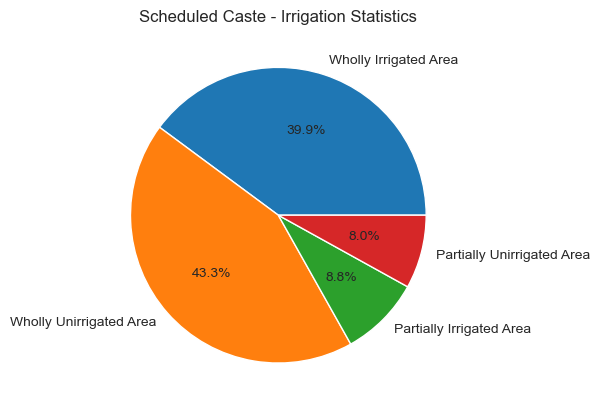

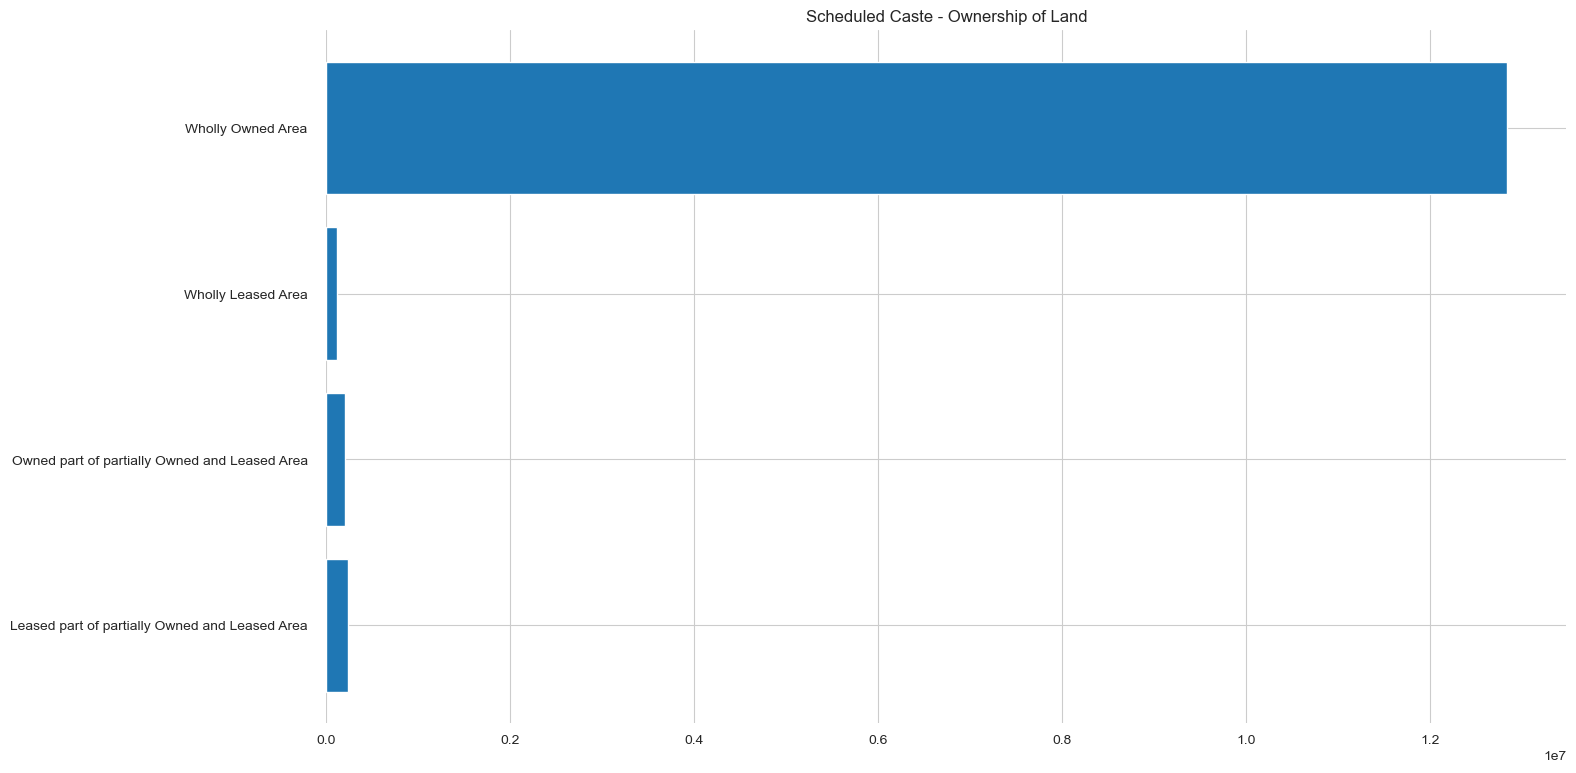

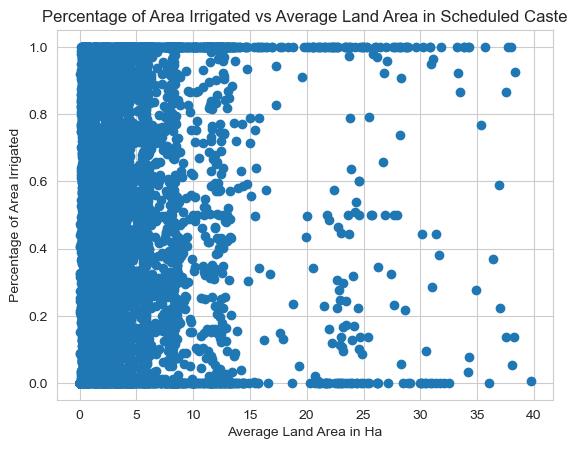

[[1.         0.26374113]
 [0.26374113 1.        ]]
228
232
468
486
7460


In [136]:
sc_sum = df_sc.sum()
sc_irri_pie_values = np.array([sc_sum[11],sc_sum[13],sc_sum[15],(sc_sum[16] - sc_sum[15])])

plt.pie(sc_irri_pie_values, labels = irri_pie_labels, autopct='%1.1f%%')
plt.title('Scheduled Caste - Irrigation Statistics')
# plt.show() 

plt.savefig('piechart_sc.png', bbox_inches='tight',dpi=300)
#Bar plot

sc_ownership_pie_values = np.array([sc_sum[20],sc_sum[22],sc_sum[26], sc_sum[27]])

fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(ownership_pie_labels, sc_ownership_pie_values)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
# ax.grid( color ='grey',
#         linestyle ='-.', linewidth = 0.5,
#         alpha = 0.2)
 
# Show top values 
ax.invert_yaxis()
ax.set_title('Scheduled Caste - Ownership of Land' )
# Show Plot

plt.show()

#heatmap
# data = np.column_stack(df_sc['Average area of a Holding'], df_sc['Net irrigated area of holdings receiving irrigation'])
# corr = np.corrcoef(data, rowvar=False)
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.show()

plt.scatter(df_sc['Average area of a Holding'][df_sc['Average area of a Holding'] < 40], df_sc['Percentage of Area Irrigated'][df_sc['Average area of a Holding'] < 40])
plt.xlabel('Average Land Area in Ha')
plt.ylabel('Percentage of Area Irrigated')
plt.title('Percentage of Area Irrigated vs Average Land Area in Scheduled Caste')
plt.show()

print(np.corrcoef(df_sc['Average area of a Holding'][df_sc['Average area of a Holding'] < 40], df_sc['Percentage of Area Irrigated'][df_sc['Average area of a Holding'] < 40]))

print(len(df_sc['Average area of a Holding'][df_sc['Average area of a Holding'] > 20]))
print(len(df_st['Average area of a Holding'][df_st['Average area of a Holding'] > 20]))
print(len(df_others['Average area of a Holding'][df_others['Average area of a Holding'] > 20]))
print(len(df_institutional['Average area of a Holding'][df_institutional['Average area of a Holding'] > 20]))
print(len(df_institutional['Average area of a Holding']))


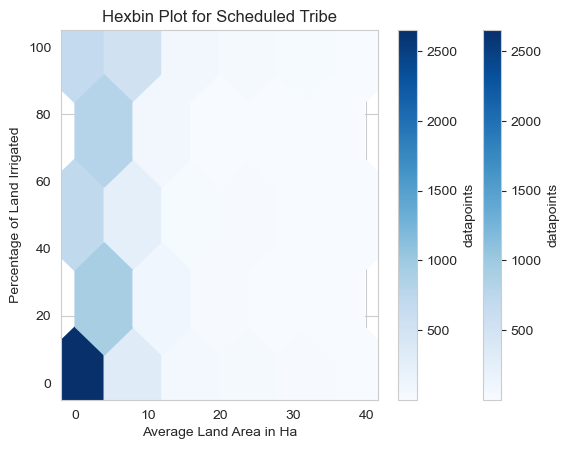

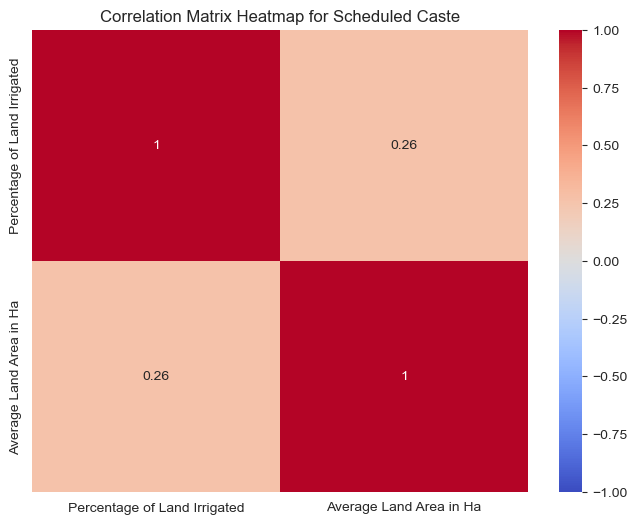

In [123]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Example data
x = np.array(df_sc['Average area of a Holding'][df_sc['Average area of a Holding'] < 40])  # Larger scale
y = np.array(df_sc['Percentage of Area Irrigated'][df_sc['Average area of a Holding'] < 40])*100   # Smaller scale

# Normalize data
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x.reshape(-1, 1)).flatten()
y_normalized = scaler.fit_transform(y.reshape(-1, 1)).flatten()

# plt.plot(y_normalized,np.arange(len(y_normalized)))

plt.hexbin(x, y, gridsize=5, cmap='Blues')
plt.colorbar(label='datapoints')
plt.ylabel('Percentage of Land Irrigated')
plt.xlabel('Average Land Area in Ha')
plt.title('Hexbin Plot for Scheduled Caste')
plt.savefig('hex_sc.png', bbox_inches='tight',dpi=300)

plt.hexbin(x, y, gridsize=5, cmap='Blues')
plt.colorbar(label='datapoints')
plt.ylabel('Percentage of Land Irrigated')
plt.xlabel('Average Land Area in Ha')
plt.title('Hexbin Plot for Scheduled Tribe')
plt.savefig('hex_st.png', bbox_inches='tight',dpi=300)
corr_st = (np.corrcoef(df_sc['Average area of a Holding'][df_sc['Average area of a Holding'] < 40], df_sc['Percentage of Area Irrigated'][df_sc['Average area of a Holding'] < 40]))
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr_st, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
heatmap.set_xticklabels(['Percentage of Land Irrigated', 'Average Land Area in Ha'], rotation=0)
heatmap.set_yticklabels(['Percentage of Land Irrigated', 'Average Land Area in Ha'], rotation=90)
heatmap.tick_params(left=False, bottom=False)
plt.title('Correlation Matrix Heatmap for Scheduled Caste')
plt.savefig('heat_sc.png', bbox_inches='tight',dpi=300)

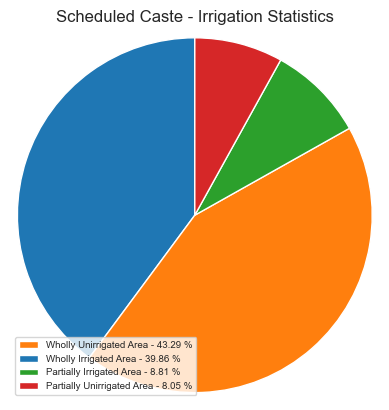

In [46]:

# colors = ['yellowgreen','red','gold','lightskyblue','purple','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
percent = 100.*sc_irri_pie_values/sc_irri_pie_values.sum()

patches, texts = plt.pie(sc_irri_pie_values, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(irri_pie_labels, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, sc_irri_pie_values),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='lower left',
           fontsize=7)
plt.title('Scheduled Caste - Irrigation Statistics')
plt.savefig('piechart_sc.png', bbox_inches='tight',dpi=300)

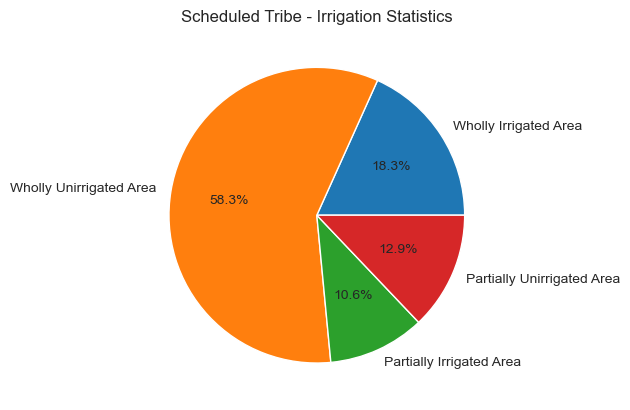

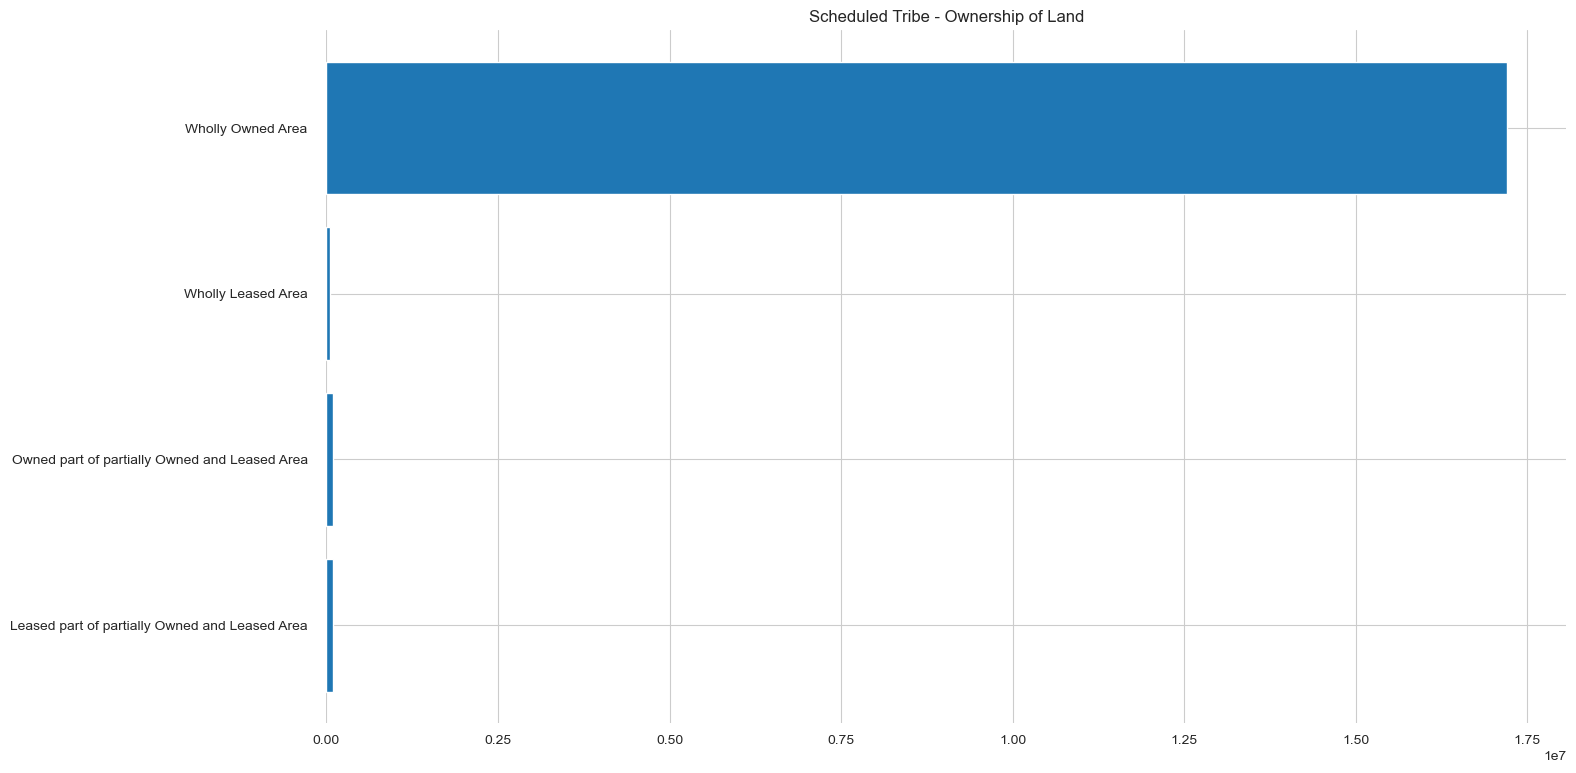

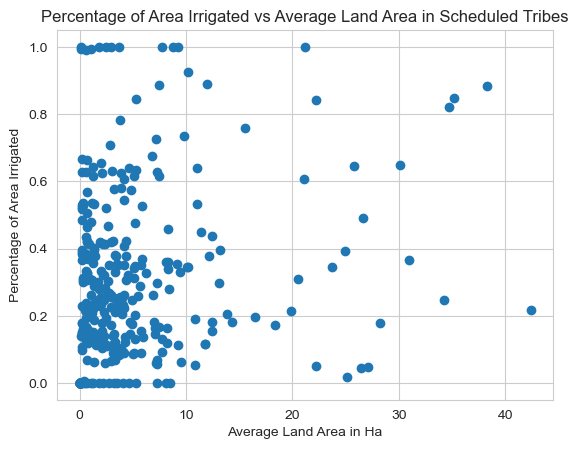

[[1.         0.27368977]
 [0.27368977 1.        ]]


In [49]:
st_sum = df_st.sum()


st_irri_pie_values = np.array([st_sum[9],st_sum[11],st_sum[13],(st_sum[14] - st_sum[13])])

plt.pie(st_irri_pie_values, labels = irri_pie_labels,colors=pie_colors, autopct='%1.1f%%')
plt.title('Scheduled Tribe - Irrigation Statistics')
# plt.show() 

plt.savefig('piechart_st.png', bbox_inches='tight',dpi=300)

st_ownership_pie_values = [st_sum[18],st_sum[20],st_sum[24], st_sum[25]]

fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(ownership_pie_labels, st_ownership_pie_values)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
# ax.grid( color ='grey',
#         linestyle ='-.', linewidth = 0.5,
#         alpha = 0.2)
 
# Show top values 
ax.invert_yaxis()
ax.set_title('Scheduled Tribe - Ownership of Land' )
# Show Plot
plt.show()


plt.scatter(df_st['Average area of a Holding'], df_st['Percentage of Area Irrigated'])
plt.xlabel('Average Land Area in Ha')
plt.ylabel('Percentage of Area Irrigated')
plt.title('Percentage of Area Irrigated vs Average Land Area in Scheduled Tribes')
plt.show()




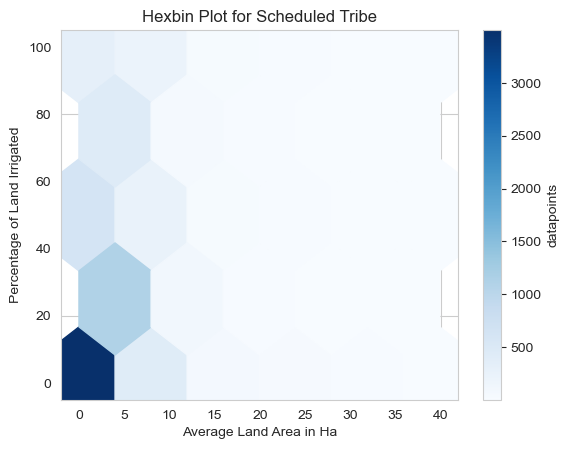

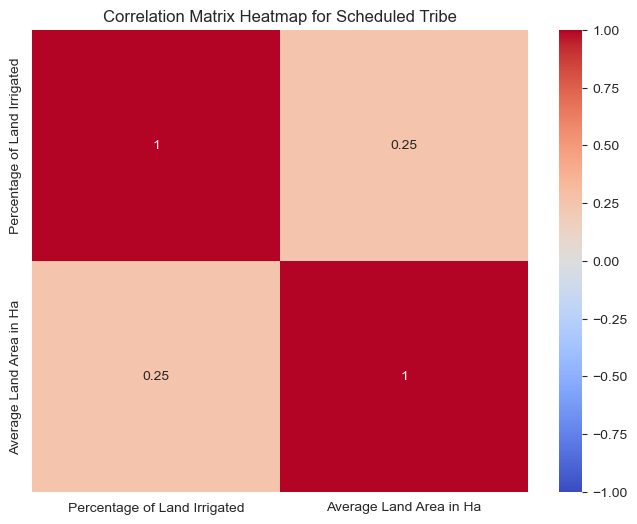

In [124]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Example data
x = np.array(df_st['Average area of a Holding'][df_st['Average area of a Holding'] < 40])  # Larger scale
y = np.array(df_st['Percentage of Area Irrigated'][df_st['Average area of a Holding'] < 40])*100   # Smaller scale

# Normalize data
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x.reshape(-1, 1)).flatten()
y_normalized = scaler.fit_transform(y.reshape(-1, 1)).flatten()

# plt.plot(y_normalized,np.arange(len(y_normalized)))

plt.hexbin(x, y, gridsize=5, cmap='Blues')
plt.colorbar(label='datapoints')
plt.ylabel('Percentage of Land Irrigated')
plt.xlabel('Average Land Area in Ha')
plt.title('Hexbin Plot for Scheduled Tribe')
plt.savefig('hex_st.png', bbox_inches='tight',dpi=300)
corr_st = (np.corrcoef(df_st['Average area of a Holding'][df_st['Average area of a Holding'] < 40], df_st['Percentage of Area Irrigated'][df_st['Average area of a Holding'] < 40]))
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr_st, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
heatmap.set_xticklabels(['Percentage of Land Irrigated', 'Average Land Area in Ha'], rotation=0)
heatmap.set_yticklabels(['Percentage of Land Irrigated', 'Average Land Area in Ha'], rotation=90)
heatmap.tick_params(left=False, bottom=False)
plt.title('Correlation Matrix Heatmap for Scheduled Tribe')
plt.savefig('heat_st.png', bbox_inches='tight',dpi=300)

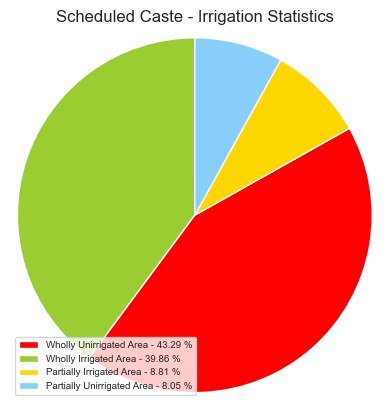

In [125]:

colors = ['yellowgreen','red','gold','lightskyblue','purple','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
percent = 100.*sc_irri_pie_values/sc_irri_pie_values.sum()

patches, texts = plt.pie(sc_irri_pie_values, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(irri_pie_labels, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, sc_irri_pie_values),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='lower left',
           fontsize=7)
plt.title('Scheduled Caste - Irrigation Statistics')
plt.savefig('piechart_sc.png', bbox_inches='tight',dpi=300)

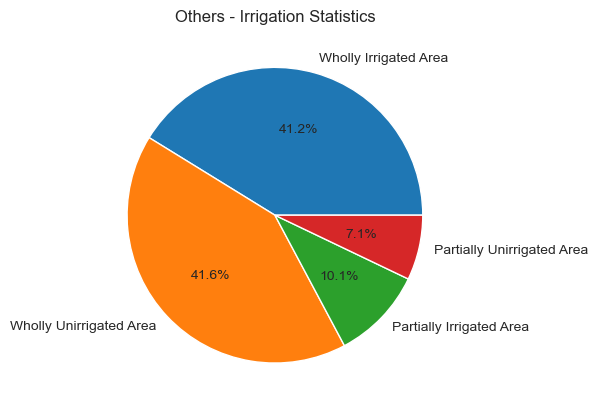

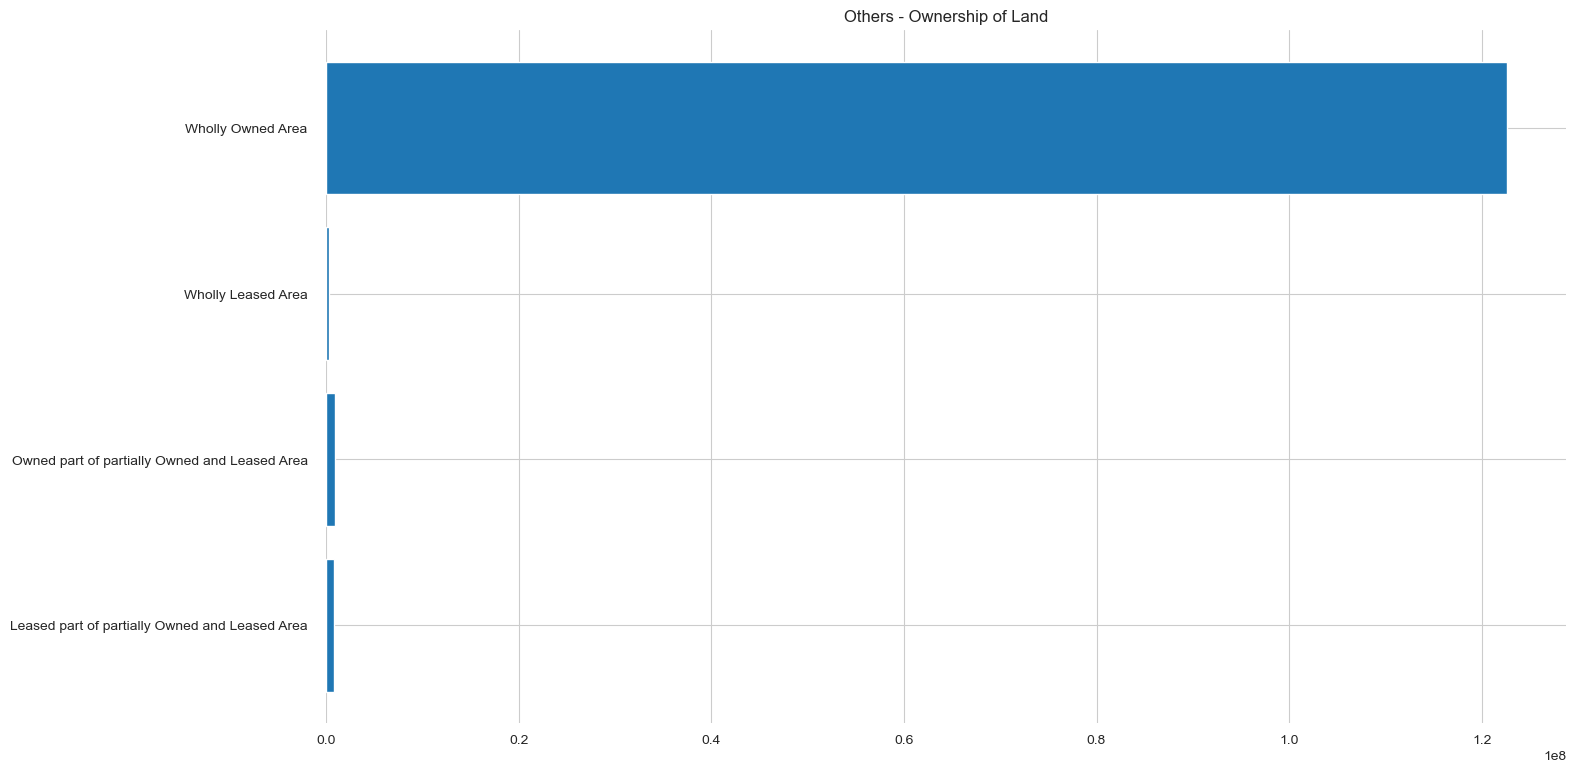

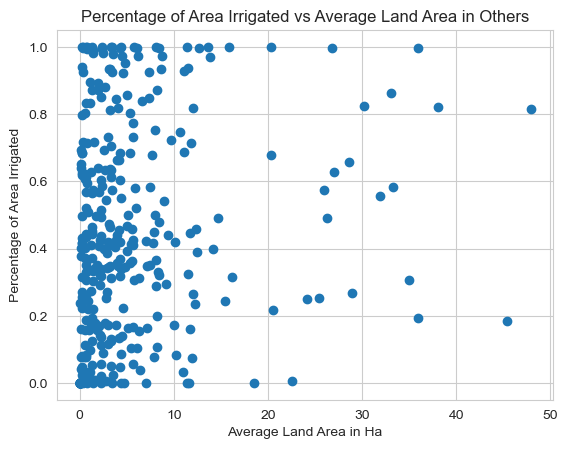

[[1.         0.21346808]
 [0.21346808 1.        ]]


In [52]:
others_sum = df_others.sum()


others_irri_pie_values = [others_sum[9],others_sum[11],others_sum[13],(others_sum[14] - others_sum[13])]

plt.pie(others_irri_pie_values, labels = irri_pie_labels,colors=pie_colors, autopct='%1.1f%%')
plt.title('Others - Irrigation Statistics')
# plt.show() 

plt.savefig('piechart_others.png', bbox_inches='tight',dpi=300)

others_ownership_pie_values = [others_sum[18],others_sum[20],others_sum[24], others_sum[25]]

fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(ownership_pie_labels, others_ownership_pie_values)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

 
# Show top values 
ax.invert_yaxis()
ax.set_title('Others - Ownership of Land' )
# Show Plot
plt.show()


plt.scatter(df_others['Average area of a Holding'], df_others['Percentage of Area Irrigated'])
plt.xlabel('Average Land Area in Ha')
plt.ylabel('Percentage of Area Irrigated')
plt.title('Percentage of Area Irrigated vs Average Land Area in Others')
plt.show()


print(np.corrcoef(df_others['Average area of a Holding'], df_others['Percentage of Area Irrigated']))

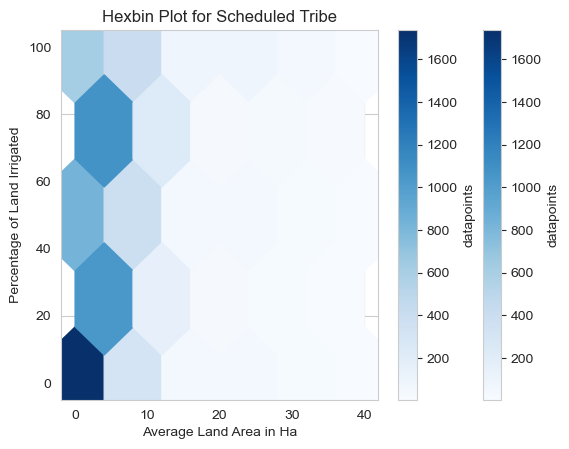

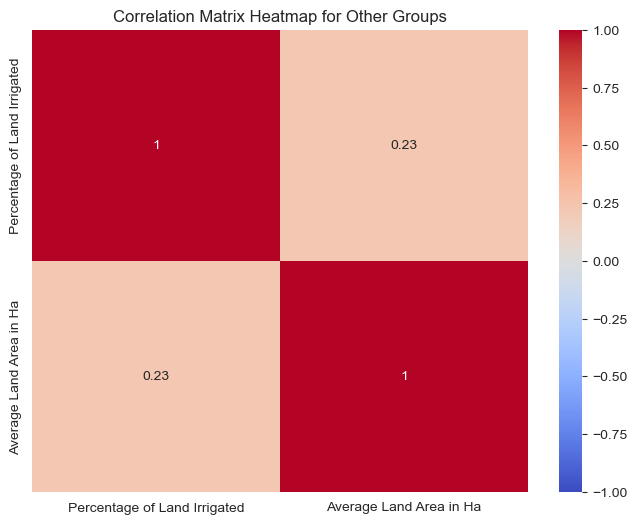

In [126]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Example data
x = np.array(df_others['Average area of a Holding'][df_others['Average area of a Holding'] < 40])  # Larger scale
y = np.array(df_others['Percentage of Area Irrigated'][df_others['Average area of a Holding'] < 40])*100   # Smaller scale

# Normalize data
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x.reshape(-1, 1)).flatten()
y_normalized = scaler.fit_transform(y.reshape(-1, 1)).flatten()

# plt.plot(y_normalized,np.arange(len(y_normalized)))

plt.hexbin(x, y, gridsize=5, cmap='Blues')
plt.colorbar(label='datapoints')
plt.ylabel('Percentage of Land Irrigated')
plt.xlabel('Average Land Area in Ha')
plt.title('Hexbin Plot for Other Groups')
plt.savefig('hex_others.png', bbox_inches='tight',dpi=300)

plt.hexbin(x, y, gridsize=5, cmap='Blues')
plt.colorbar(label='datapoints')
plt.ylabel('Percentage of Land Irrigated')
plt.xlabel('Average Land Area in Ha')
plt.title('Hexbin Plot for Scheduled Tribe')
plt.savefig('hex_st.png', bbox_inches='tight',dpi=300)
corr_st = (np.corrcoef(df_others['Average area of a Holding'][df_others['Average area of a Holding'] < 40], df_others['Percentage of Area Irrigated'][df_others['Average area of a Holding'] < 40]))
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr_st, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
heatmap.set_xticklabels(['Percentage of Land Irrigated', 'Average Land Area in Ha'], rotation=0)
heatmap.set_yticklabels(['Percentage of Land Irrigated', 'Average Land Area in Ha'], rotation=90)
heatmap.tick_params(left=False, bottom=False)
plt.title('Correlation Matrix Heatmap for Other Groups')
plt.savefig('heat_other.png', bbox_inches='tight',dpi=300)

ValueError: could not convert string to float: 'MarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginalMarginalSmallLargeSemi-MediumSemi-MediumMediumMediumMediumLargeMarginal'

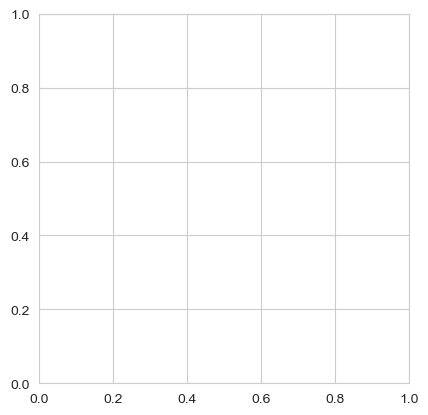

In [128]:
institutional_sum = df_institutional.sum()


institutional_irri_pie_values = [institutional_sum[9],institutional_sum[11],institutional_sum[13],(institutional_sum[14] - institutional_sum[13])]

plt.pie(institutional_irri_pie_values, labels = irri_pie_labels,colors=pie_colors, autopct='%1.1f%%')
plt.title('Institutional - Irrigation Statistics')
# plt.show() 

plt.savefig('piechart_inst.png', bbox_inches='tight',dpi=300)

institutional_ownership_pie_values = [institutional_sum[18],institutional_sum[20],institutional_sum[24], institutional_sum[25]]

fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(ownership_pie_labels, institutional_ownership_pie_values)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

 
# Show top values 
ax.invert_yaxis()
ax.set_title('Institutional - Ownership of Land' )
# Show Plot
plt.show()


plt.scatter(df_institutional['Average area of a Holding'], df_institutional['Percentage of Area Irrigated'],s=5)
plt.xlabel('Average Land Area in Ha')
plt.ylabel('Percentage of Area Irrigated')
plt.title('Percentage of Area Irrigated vs Average Land Area in Institutional Land')
plt.show()


print(np.corrcoef(df_institutional['Average area of a Holding'], df_institutional['Percentage of Area Irrigated']))

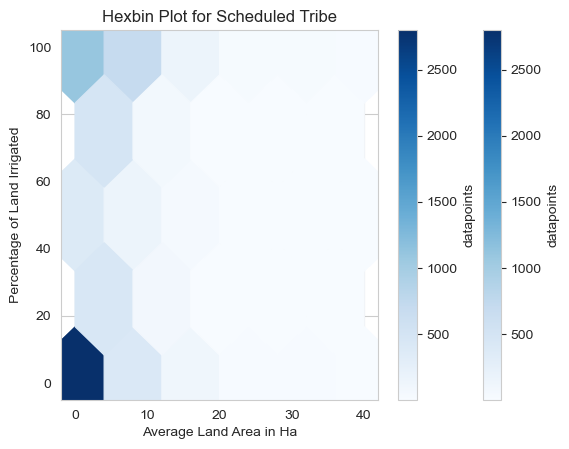

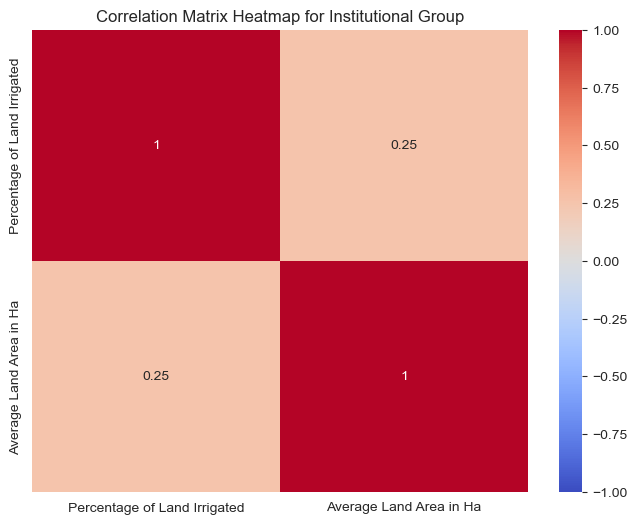

In [127]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Example data
x = np.array(df_institutional['Average area of a Holding'][df_institutional['Average area of a Holding'] < 40])  # Larger scale
y = np.array(df_institutional['Percentage of Area Irrigated'][df_institutional['Average area of a Holding'] < 40])*100   # Smaller scale

# Normalize data
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x.reshape(-1, 1)).flatten()
y_normalized = scaler.fit_transform(y.reshape(-1, 1)).flatten()

# plt.plot(y_normalized,np.arange(len(y_normalized)))

plt.hexbin(x, y, gridsize=5, cmap='Blues')
plt.colorbar(label='datapoints')
plt.ylabel('Percentage of Land Irrigated')
plt.xlabel('Average Land Area in Ha')
plt.title('Hexbin Plot for Institutional Group')
plt.savefig('hex_insti.png', bbox_inches='tight',dpi=300)

plt.hexbin(x, y, gridsize=5, cmap='Blues')
plt.colorbar(label='datapoints')
plt.ylabel('Percentage of Land Irrigated')
plt.xlabel('Average Land Area in Ha')
plt.title('Hexbin Plot for Scheduled Tribe')
plt.savefig('hex_st.png', bbox_inches='tight',dpi=300)
corr_st = (np.corrcoef(df_institutional['Average area of a Holding'][df_institutional['Average area of a Holding'] < 40], df_institutional['Percentage of Area Irrigated'][df_institutional['Average area of a Holding'] < 40]))
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr_st, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
heatmap.set_xticklabels(['Percentage of Land Irrigated', 'Average Land Area in Ha'], rotation=0)
heatmap.set_yticklabels(['Percentage of Land Irrigated', 'Average Land Area in Ha'], rotation=90)
heatmap.tick_params(left=False, bottom=False)
plt.title('Correlation Matrix Heatmap for Institutional Group')
plt.savefig('heat_insti.png', bbox_inches='tight',dpi=300)